## Alucar - analisando as vendas

In [491]:
import pandas as pd
alucar = pd.read_csv('Dados/alucar.csv')

In [492]:
alucar.head(1) #arquivos com as vendas do mes

,mes,vendas
0,2017-01-31,10


In [493]:
#analisando o alucar
alucar.shape

(24, 2)

In [494]:
type(alucar)

pandas.core.frame.DataFrame

In [495]:
alucar.info() #quantidade de dados nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [496]:
#outra maneira de ver os dados nulos
alucar.isna().sum()

mes       0
vendas    0
dtype: int64

In [497]:
alucar.isna().sum().sum() #somar os dados nulos das duas coluna existentes

0

In [498]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [499]:
#converter os dados do mes que está como object para time.

In [500]:
alucar['mes'] = pd.to_datetime(alucar.mes)

In [501]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [502]:
alucar.head(1)

,mes,vendas
0,2017-01-31,10


In [503]:
import seaborn as sns

In [504]:
sns.__version__

'0.11.2'

In [505]:
#comando para visualizar cada linha
%matplotlib inline 
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='mes', ylabel='vendas'>

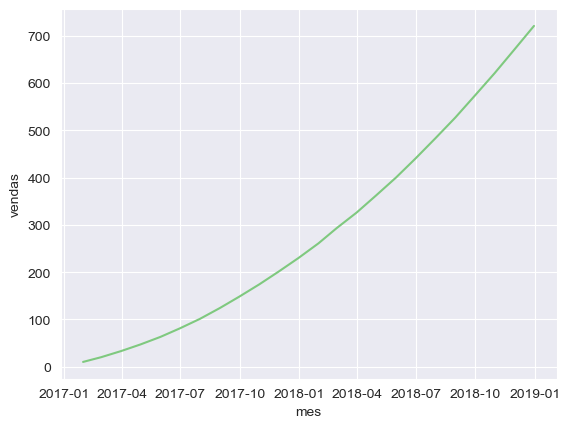

In [506]:
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)

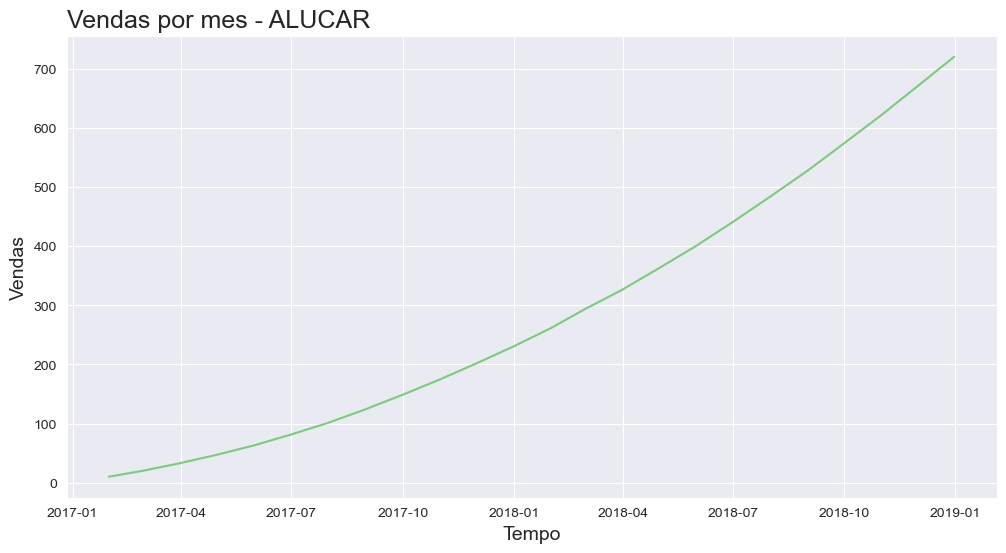

In [507]:
#embelezando o grafico
sns.set_palette('Accent') #cor do grafico
sns.set_style('darkgrid') #fundo do grafico
ax = sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
ax.figure.set_size_inches(12,6) #tamanho total do grafico
ax.set_title('Vendas por mes - ALUCAR', loc='left', fontsize=18) #titulo do grafico
ax.set_xlabel('Tempo', fontsize=14) #texto de X
ax.set_ylabel('Vendas', fontsize=14) #texto de Y
ax = ax #retira um pequeno texto que aparece em cima do grafico

### Decomposiçao e autocorrelaçao

In [508]:
alucar.head(2)

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20


In [509]:
alucar['aumento'] = alucar['vendas'].diff() #Diferença entre as linhas
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


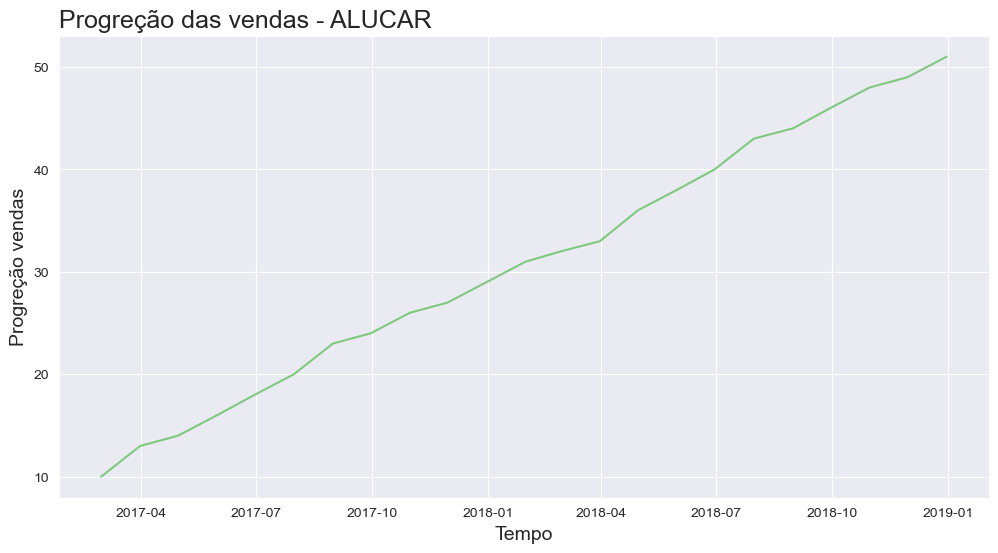

In [510]:
#embelezando o grafico
sns.set_palette('Accent') #cor do grafico
sns.set_style('darkgrid') #fundo do grafico
ax = sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
ax.figure.set_size_inches(12,6) #tamanho total do grafico
ax.set_title('Progreção das vendas - ALUCAR', loc='left', fontsize=18) #titulo do grafico
ax.set_xlabel('Tempo', fontsize=14) #texto de X
ax.set_ylabel('Progreção vendas', fontsize=14) #texto de Y
ax = ax #retira um pequeno texto que aparece em cima do grafico

In [511]:
#criando uma funçao para fazer o mesmo garfico mais rapido
def plotar(titulo, labelx, labely, x, y, dataset): #funçao nova com meus parametros
    sns.set_palette('Accent') #cor do grafico
    sns.set_style('darkgrid') #fundo do grafico
    ax = sns.lineplot(x = x, y = y, data = dataset)
    ax.figure.set_size_inches(12,6) #tamanho total do grafico
    ax.set_title(titulo, loc='left', fontsize=18) #titulo do grafico
    ax.set_xlabel(labelx, fontsize=14) #texto de X
    ax.set_ylabel(labely, fontsize=14) #texto de Y
    ax = ax #retira um pequeno texto que aparece em cima do grafico

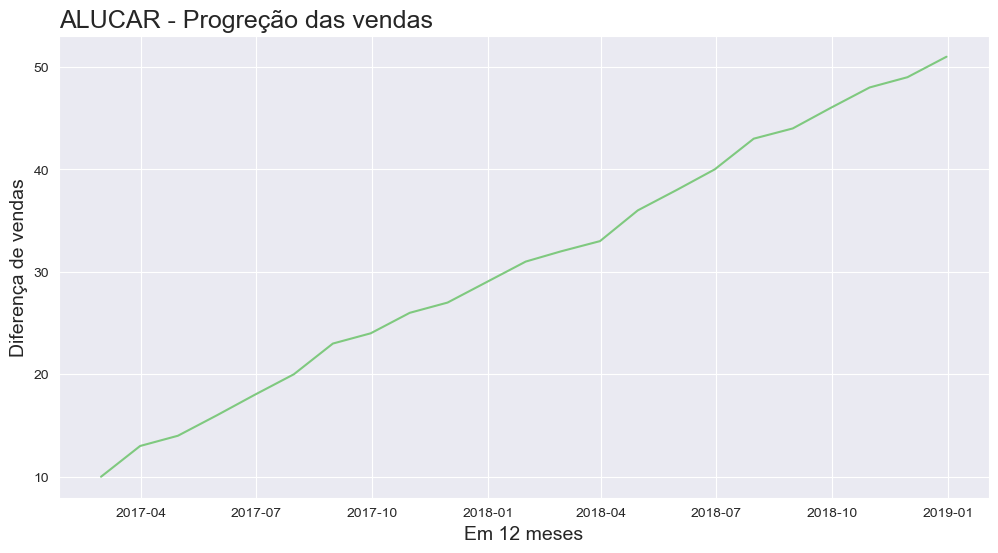

In [512]:
plotar('ALUCAR - Progreção das vendas', 'Em 12 meses', 'Diferença de vendas', 'mes', 'aumento', alucar)

In [513]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


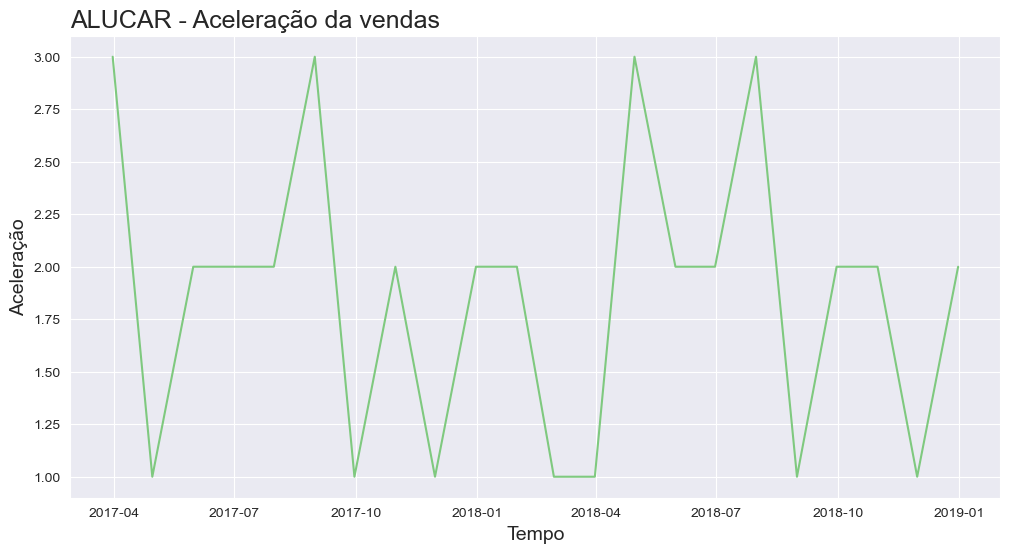

In [514]:
plotar('ALUCAR - Aceleração da vendas', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

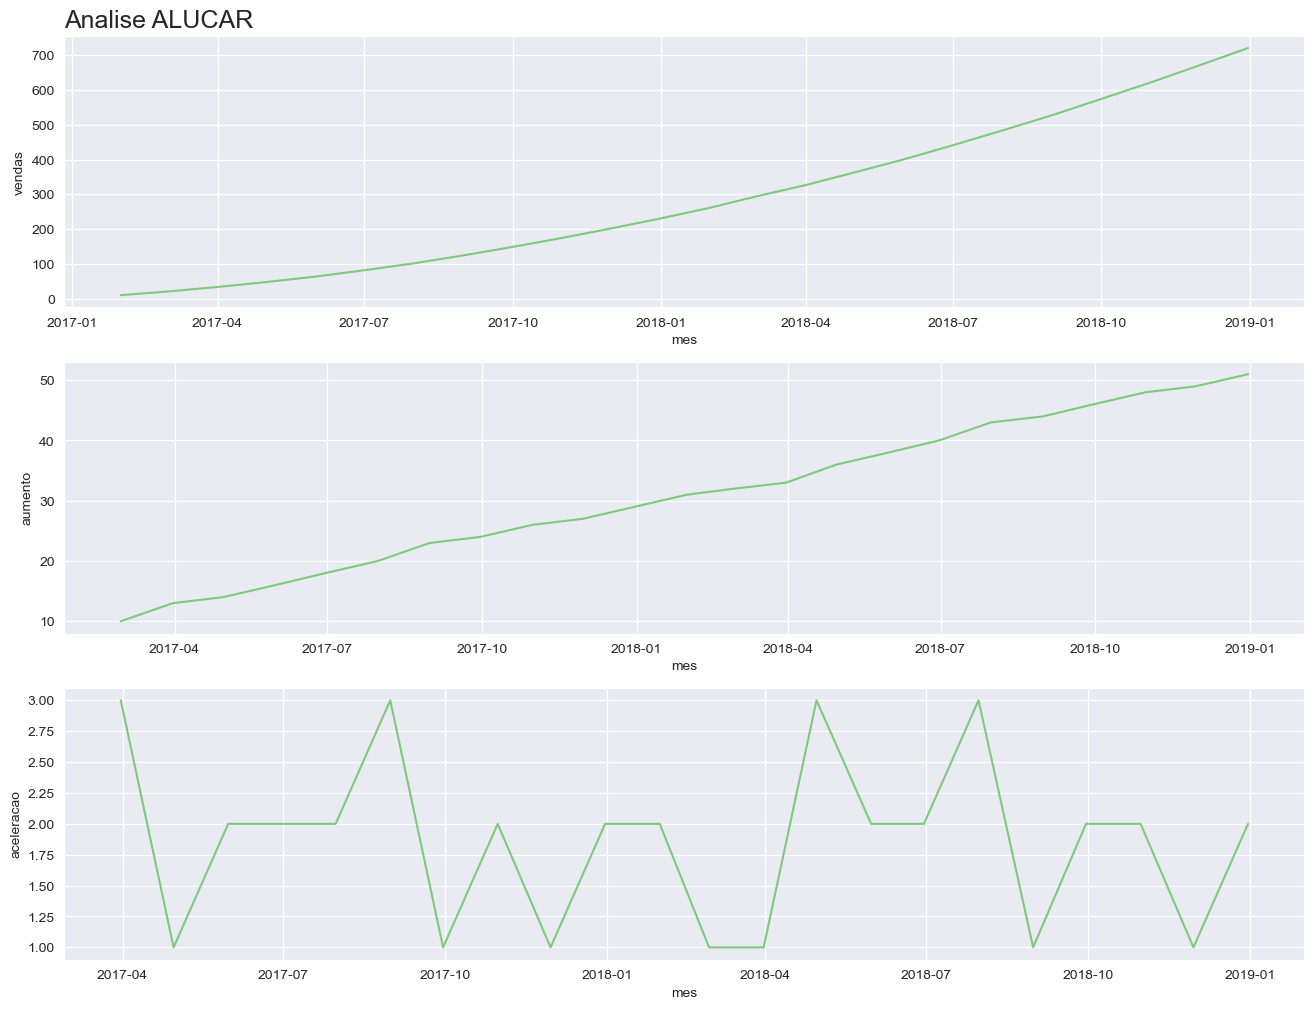

In [515]:
#para visualizar varios graficos ao mesmo tempo
plt.figure(figsize=(16,12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Analise ALUCAR', fontsize=18, loc='left')
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
plt.subplot(3, 1, 2)
sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
plt.subplot(3, 1, 3)
sns.lineplot(x = 'mes', y = 'aceleracao', data = alucar)
ax = ax

In [516]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x = x, y = y1, data = dataset)
    plt.subplot(3, 1, 2)
    sns.lineplot(x = x, y = y2, data = dataset)
    plt.subplot(3, 1, 3)
    sns.lineplot(x = x, y = y3, data = dataset)
    ax = ax

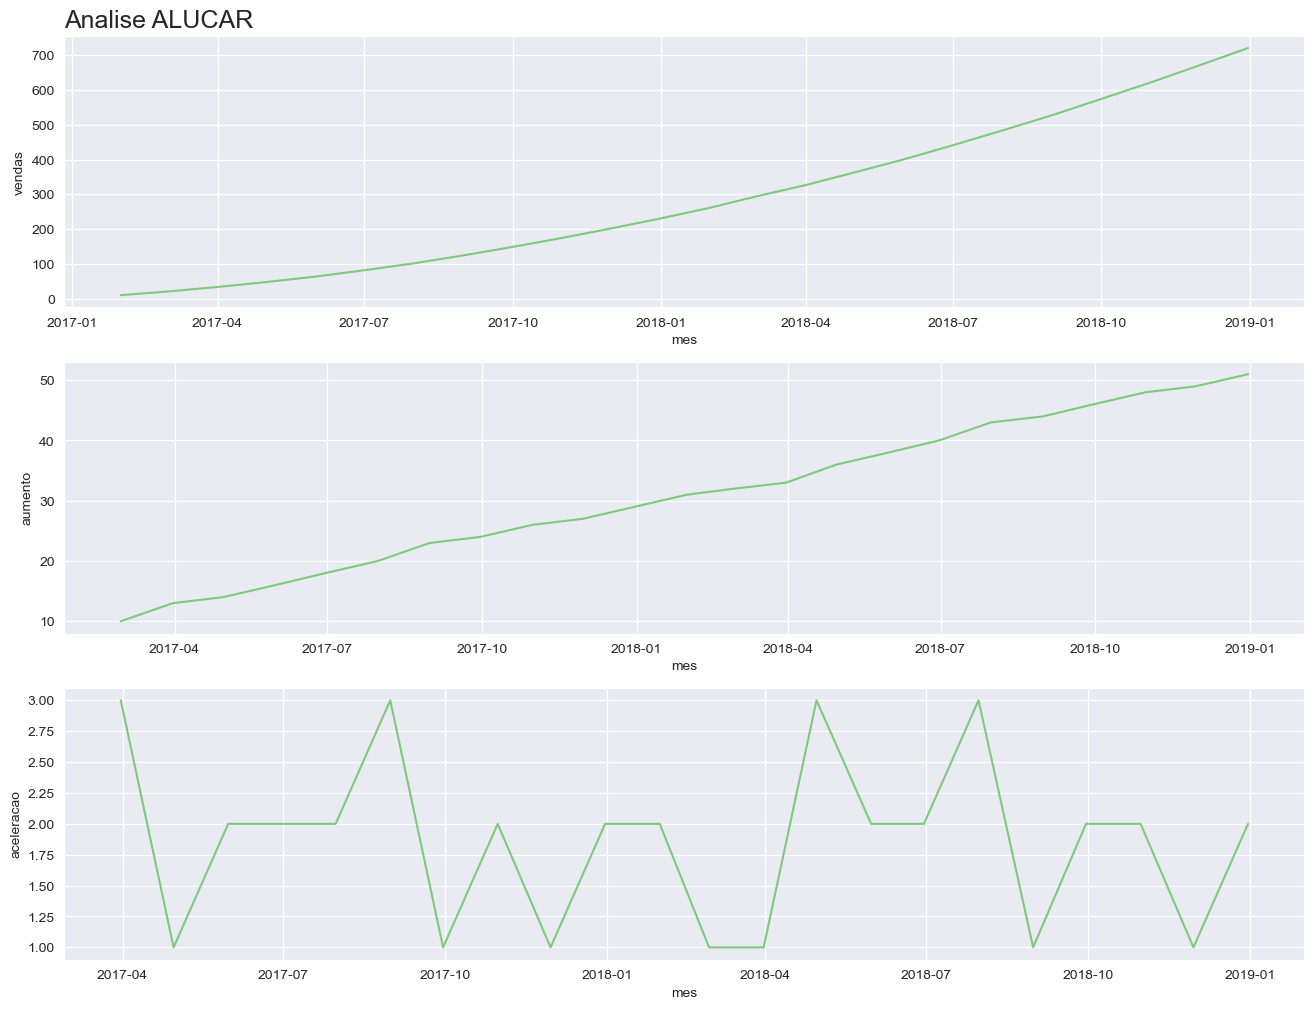

In [517]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Analise ALUCAR')

In [518]:
#Autocorrelaçao (beta)
from pandas.plotting import autocorrelation_plot

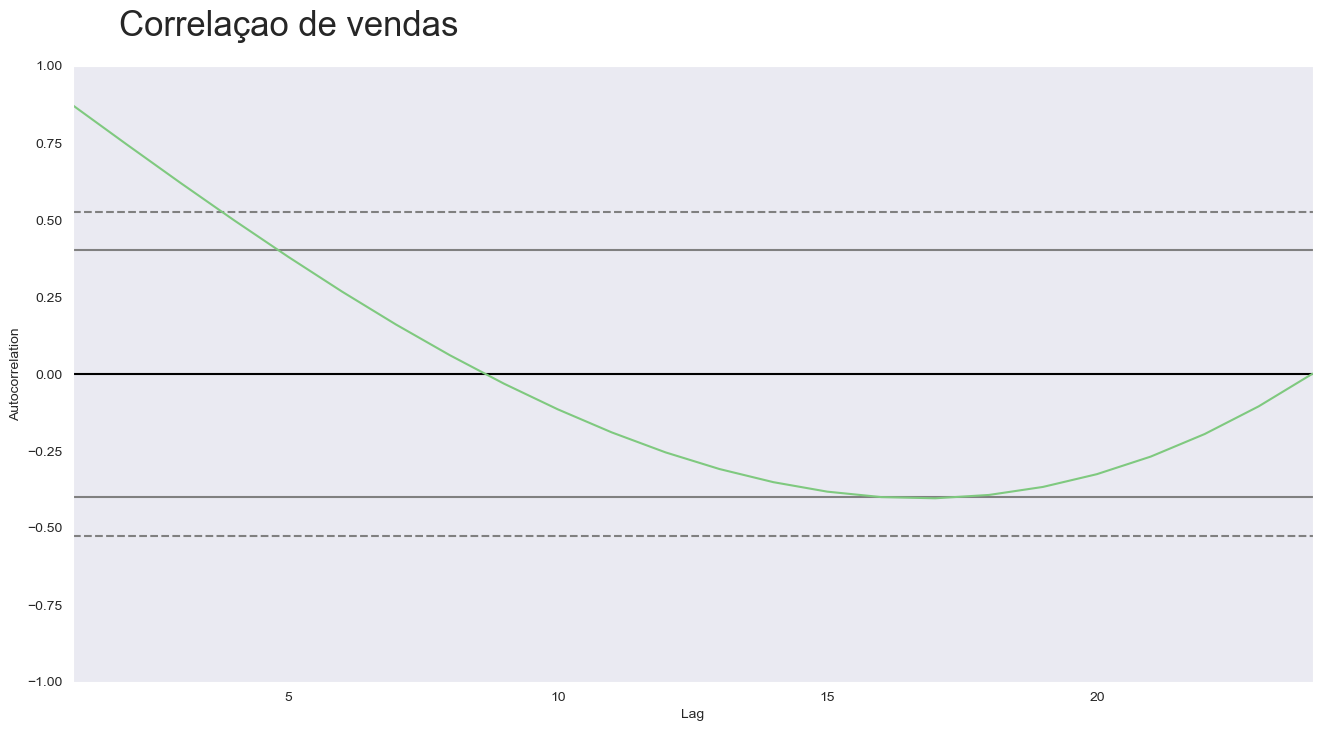

In [519]:
ax = plt.figure(figsize=(16,8))
ax.suptitle('Correlaçao de vendas', fontsize=25, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
#mostra que as vendas em até 7 dias tem relação entre elas (seja la o que isso quer dizer)
ax = ax

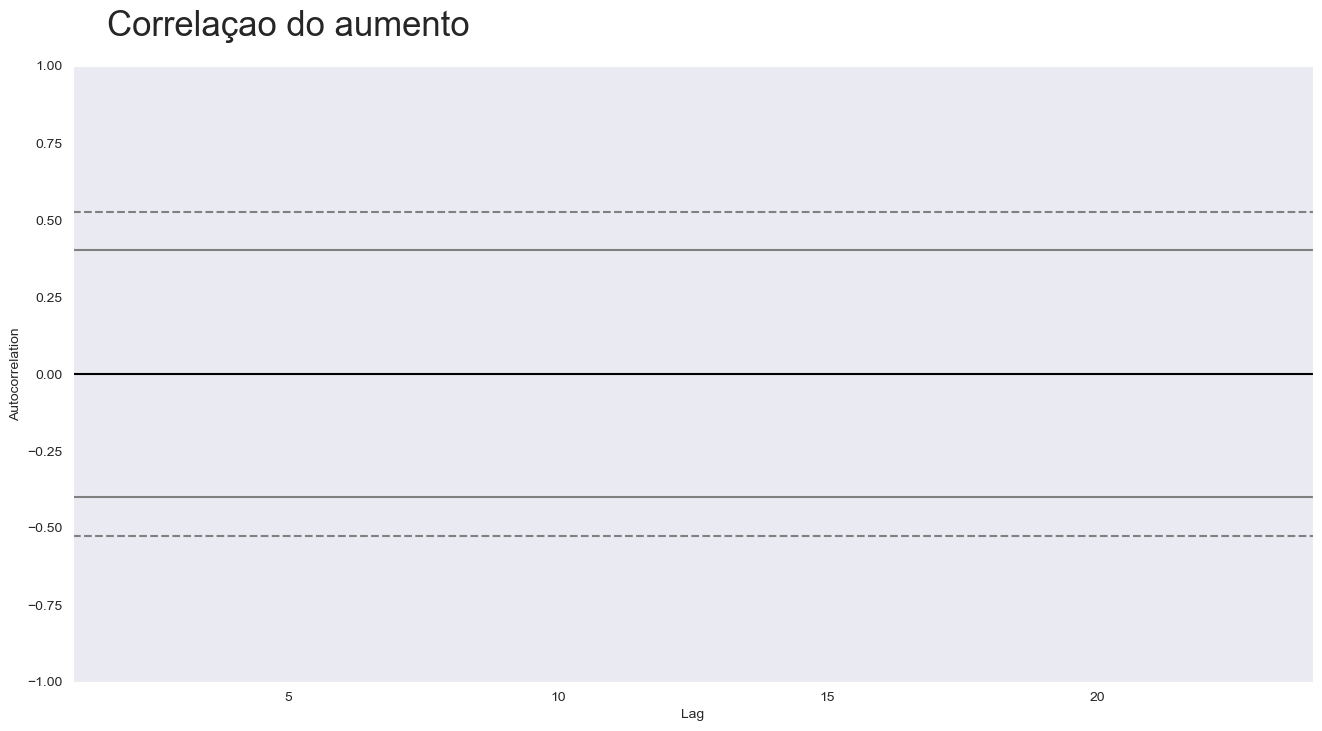

In [520]:
ax = plt.figure(figsize=(16,8))
ax.suptitle('Correlaçao do aumento', fontsize=25, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'])
#mostra que as vendas em até 7 dias tem relação entre elas (seja la o que isso quer dizer)
ax = ax
#nao tem valor, pois o index começa com NaN

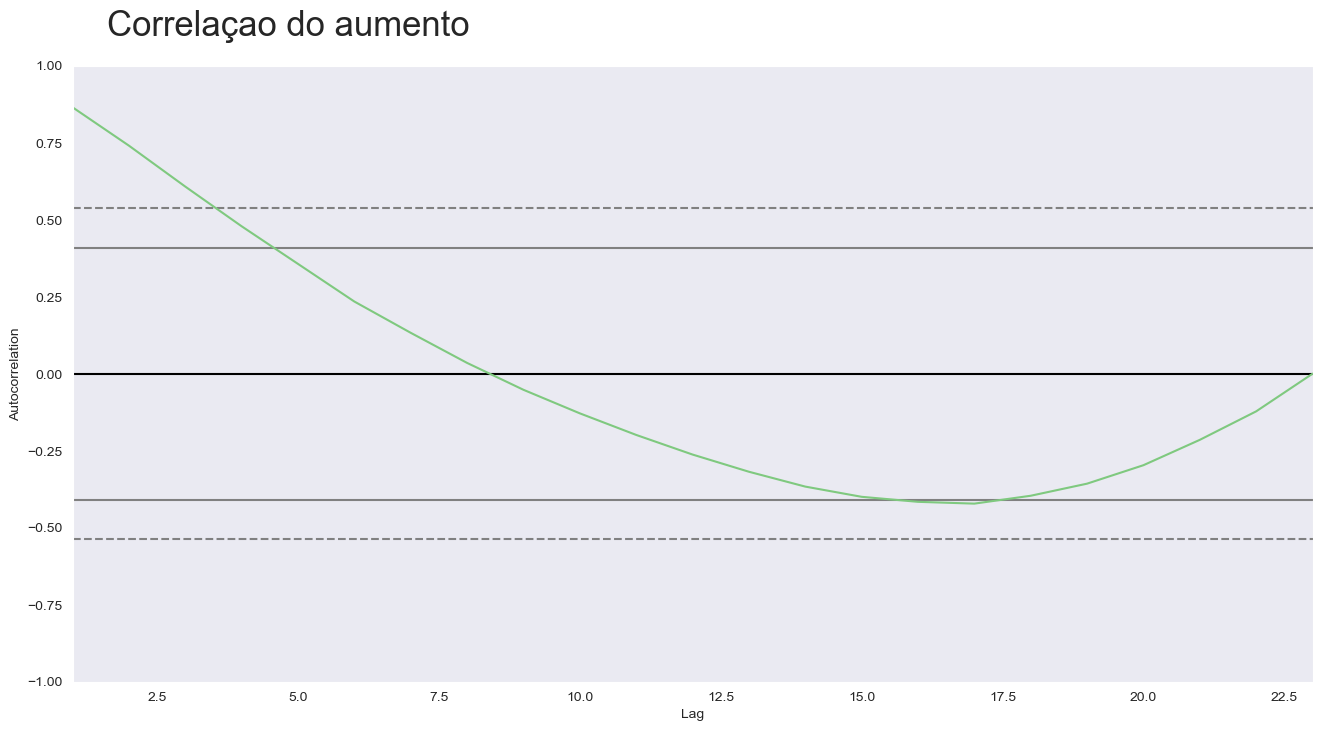

In [521]:
ax = plt.figure(figsize=(16,8))
ax.suptitle('Correlaçao do aumento', fontsize=25, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:]) #definindo o ponto de partida
#mostra que as vendas em até 7 dias tem relação entre elas (seja la o que isso quer dizer)
ax = ax
#corrigindo o erro anterior

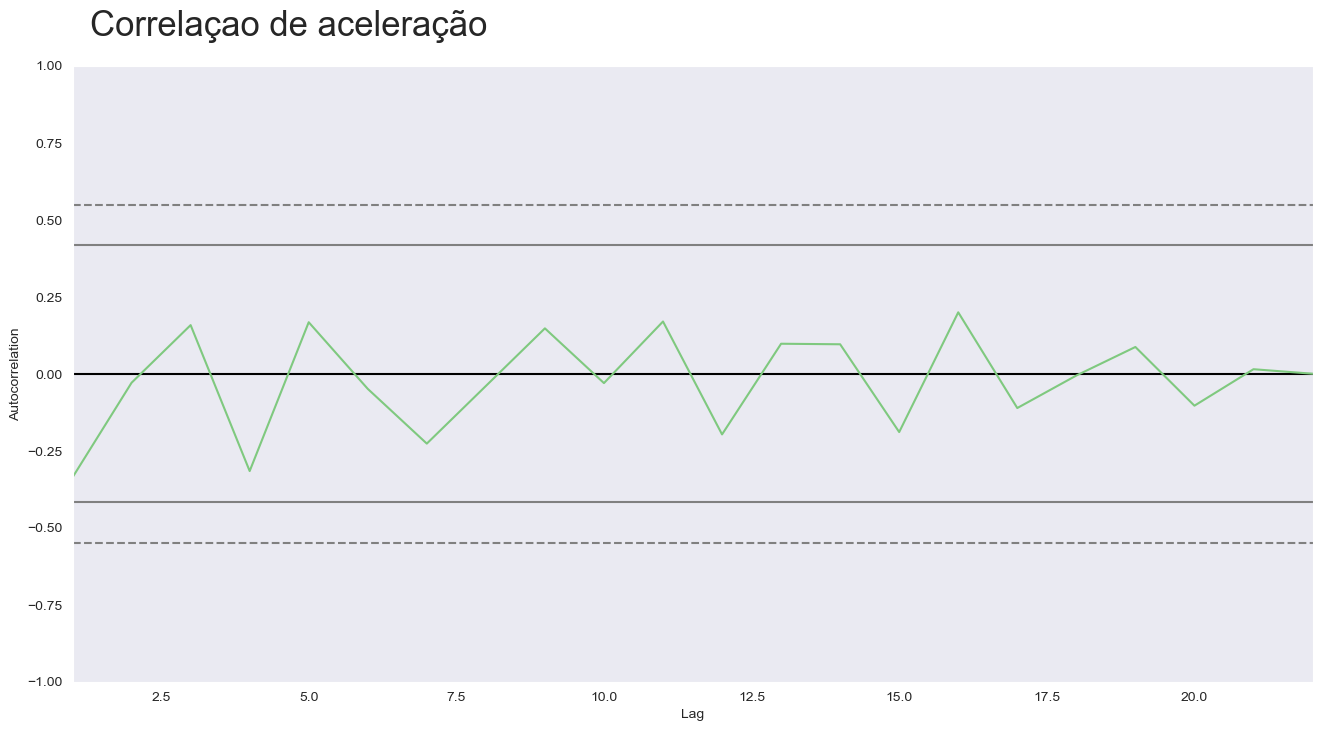

In [522]:
ax = plt.figure(figsize=(16,8))
ax.suptitle('Correlaçao de aceleração', fontsize=25, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:]) #definindo o ponto de partida
#mostra que as vendas em até 7 dias tem relação entre elas (seja la o que isso quer dizer)
ax = ax

### Importancia da decomposição e sazonalidade

In [523]:
assinantes = pd.read_csv('Dados/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [524]:
assinantes.shape

(24, 2)

In [525]:
assinantes.isna().sum().sum()

0

In [526]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [527]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()

In [528]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


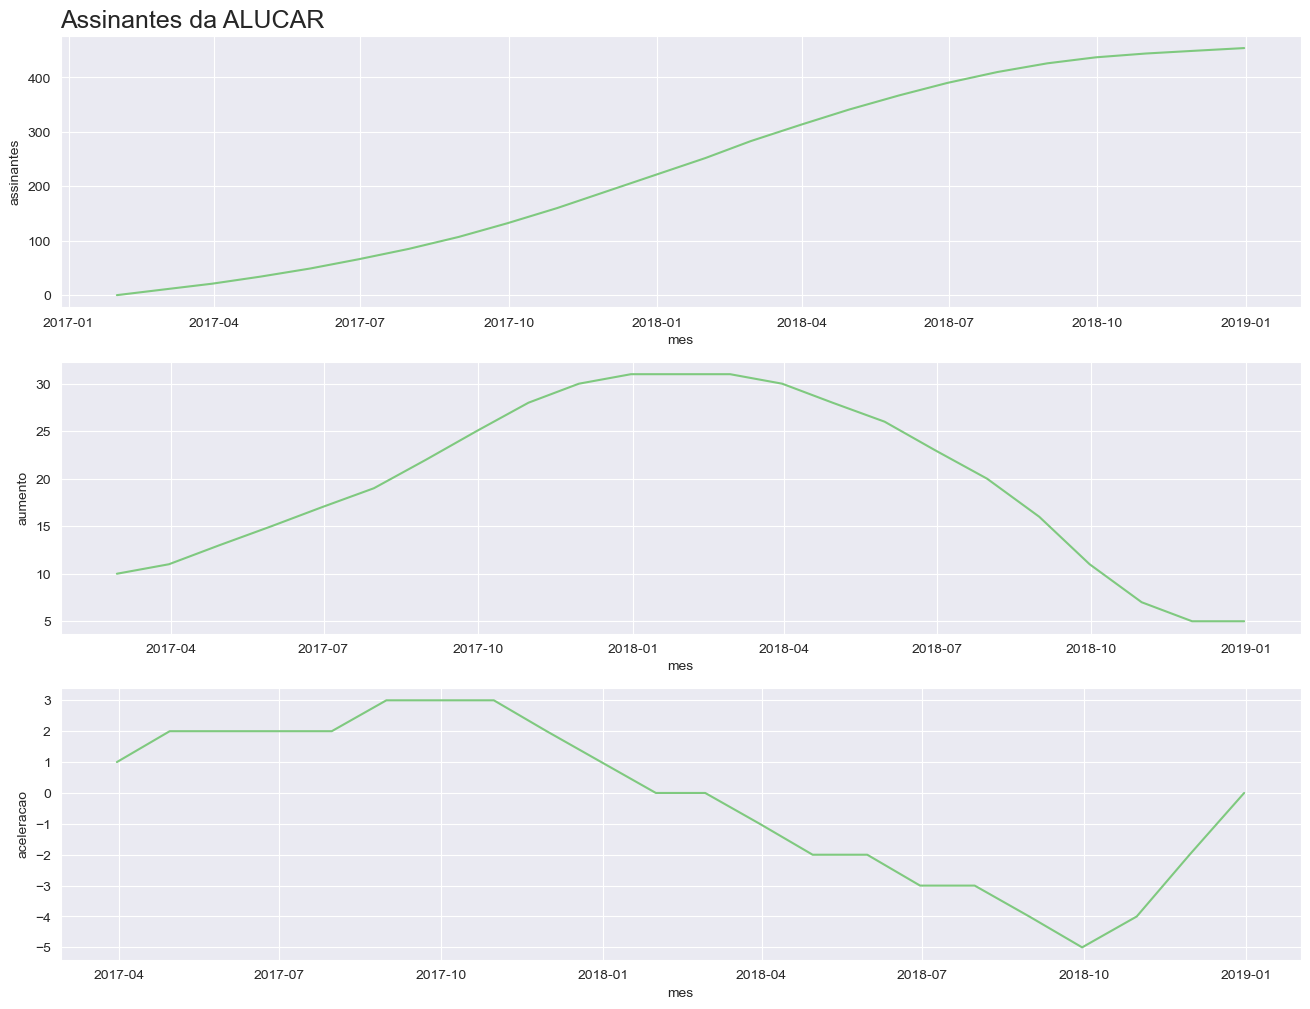

In [529]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Assinantes da ALUCAR')

## Chocolura

In [530]:
chocolura = pd.read_csv('Dados/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [531]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.head()

,mes,vendas
0,2017-01-01,210
1,2017-02-01,185
2,2017-03-01,209
3,2017-04-01,280
4,2017-05-01,211


In [532]:
chocolura.isna().sum().sum()

0

In [533]:
chocolura.shape

(24, 2)

In [534]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()

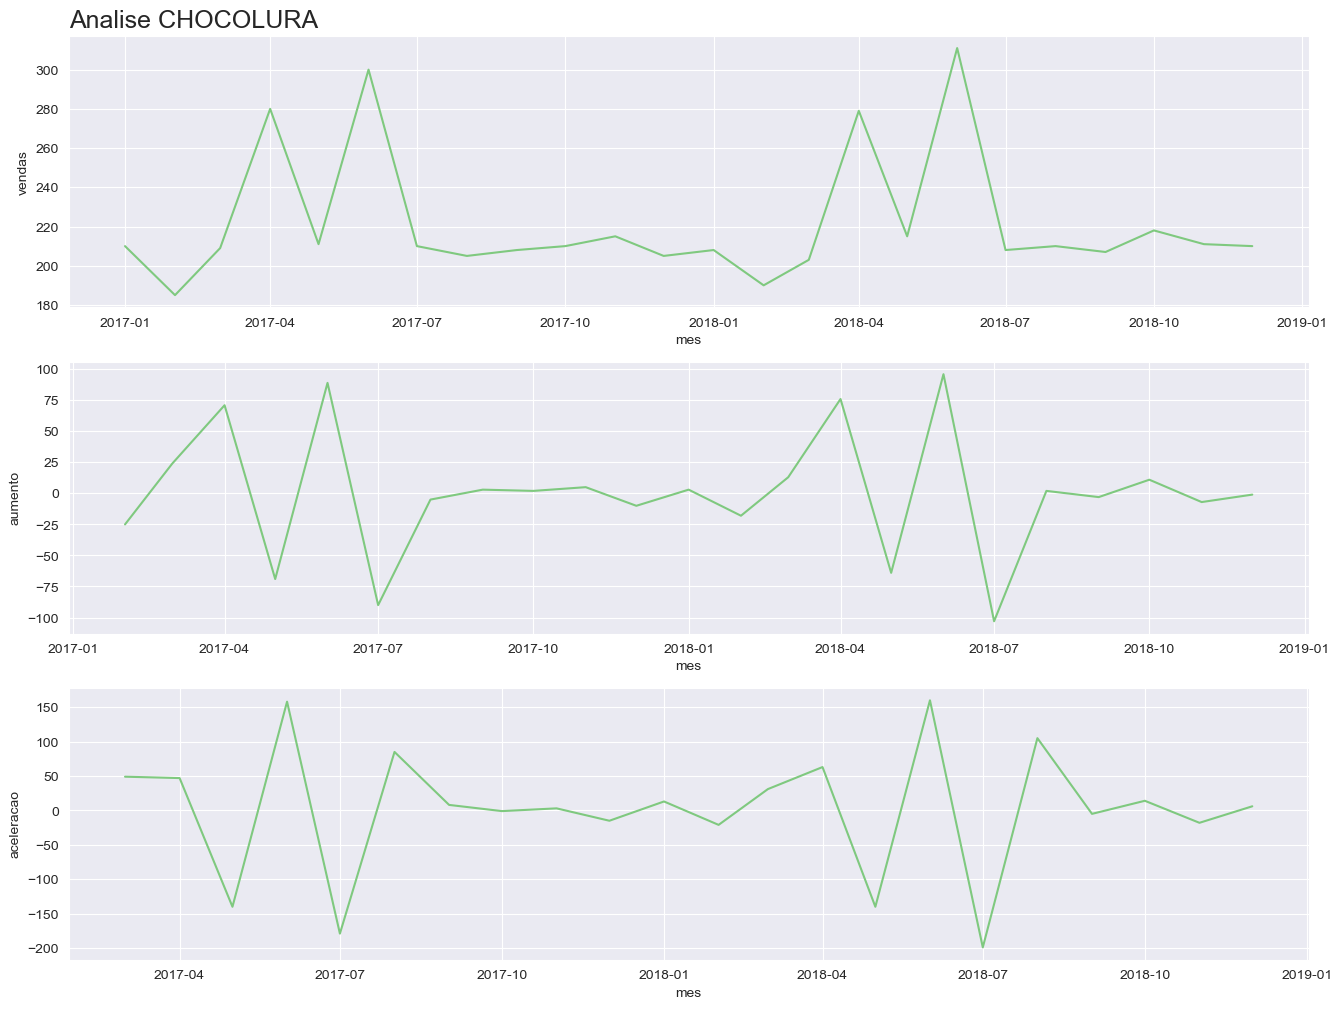

In [535]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Analise CHOCOLURA')
#sozonalidade, perceba um padrão.

In [536]:
vendas_por_dia = pd.read_csv('Dados/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [537]:
vendas_por_dia.isna().sum().sum()
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

In [538]:
vendas_por_dia.shape

(61, 2)

In [539]:
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [540]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()

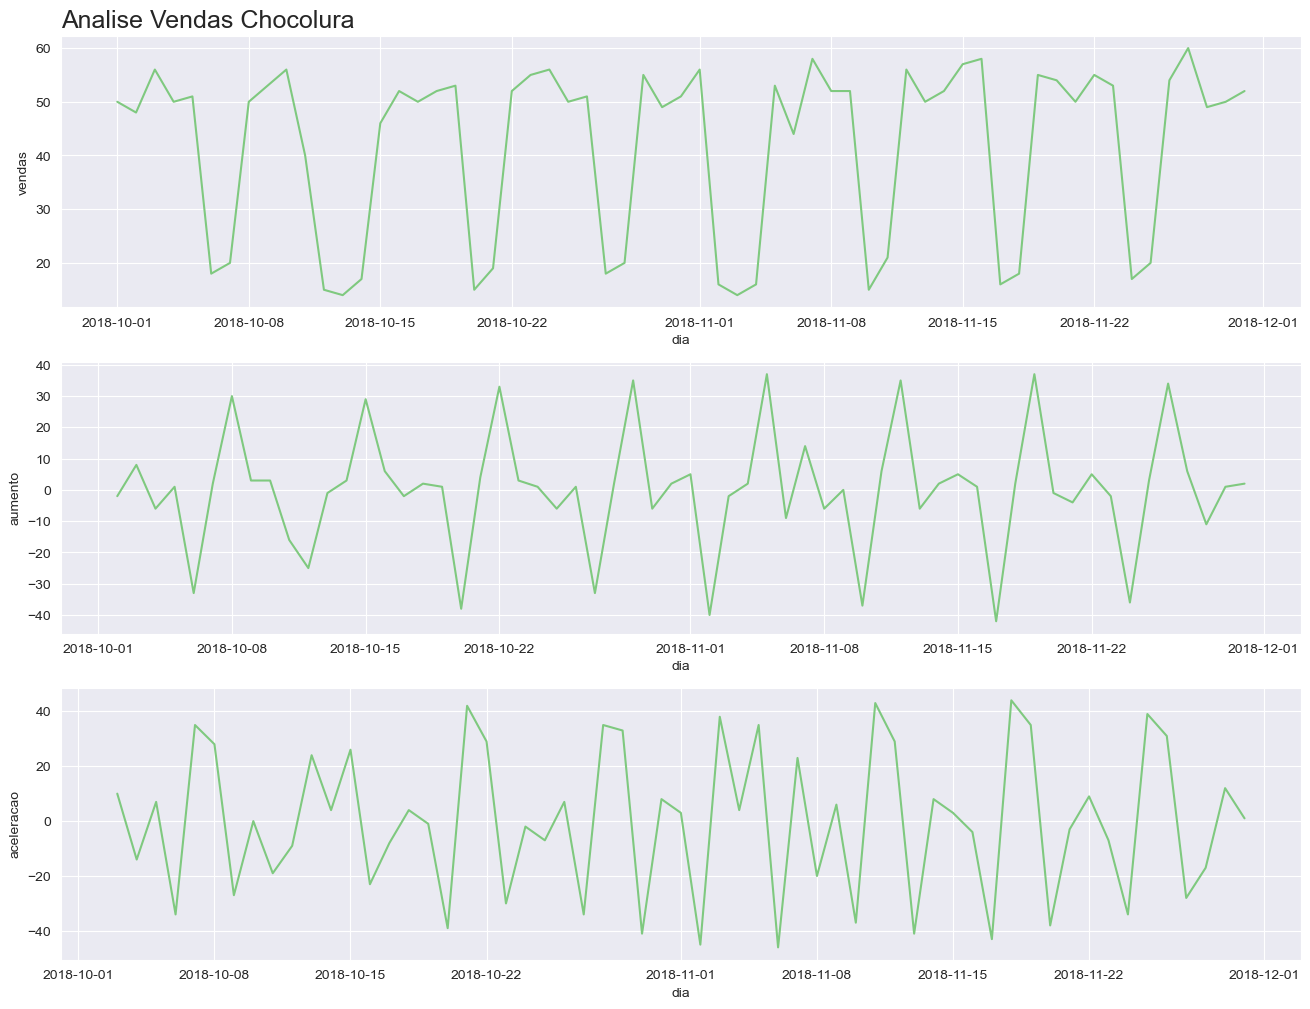

In [541]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Analise Vendas Chocolura')
#sozonalidade, perceba um padrão.

In [542]:
import datetime as dt
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.weekday
vendas_por_dia

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,0
1,2018-10-02,48,-2.0,NaN,1
2,2018-10-03,56,8.0,10.0,2
3,2018-10-04,50,-6.0,-14.0,3
4,2018-10-05,51,1.0,7.0,4
...,...,...,...,...,...
56,2018-11-26,54,34.0,31.0,0
57,2018-11-27,60,6.0,-28.0,1
58,2018-11-28,49,-11.0,-17.0,2
59,2018-11-29,50,1.0,12.0,3


In [543]:
vendas_por_dia['dia_da_semana'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [544]:
dias_semana = {0: 'segunda', 1:'terça', 2:'quarta', 3:'quinta', 4:'sexta', 5:'sabado', 6:'domingo'}

In [545]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_semana)
vendas_por_dia.head(7) #ver que nos fds as vendas caem

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,segunda
1,2018-10-02,48,-2.0,NaN,terça
2,2018-10-03,56,8.0,10.0,quarta
3,2018-10-04,50,-6.0,-14.0,quinta
4,2018-10-05,51,1.0,7.0,sexta
5,2018-10-06,18,-33.0,-34.0,sabado
6,2018-10-07,20,2.0,35.0,domingo


In [546]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round(2)

C:\Users\Notebook Lenovo\AppData\Local\Temp\ipykernel_10876\199871560.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round(2)


In [547]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
domingo,18.88,3.00,30.75
quarta,53.11,1.44,2.11
quinta,51.33,-1.78,-3.22
sabado,15.88,-27.75,-19.88
segunda,52.33,33.75,30.75
sexta,44.56,-6.78,-5.00
terça,51.67,-0.67,-34.25


### Noirmalização e statmodel

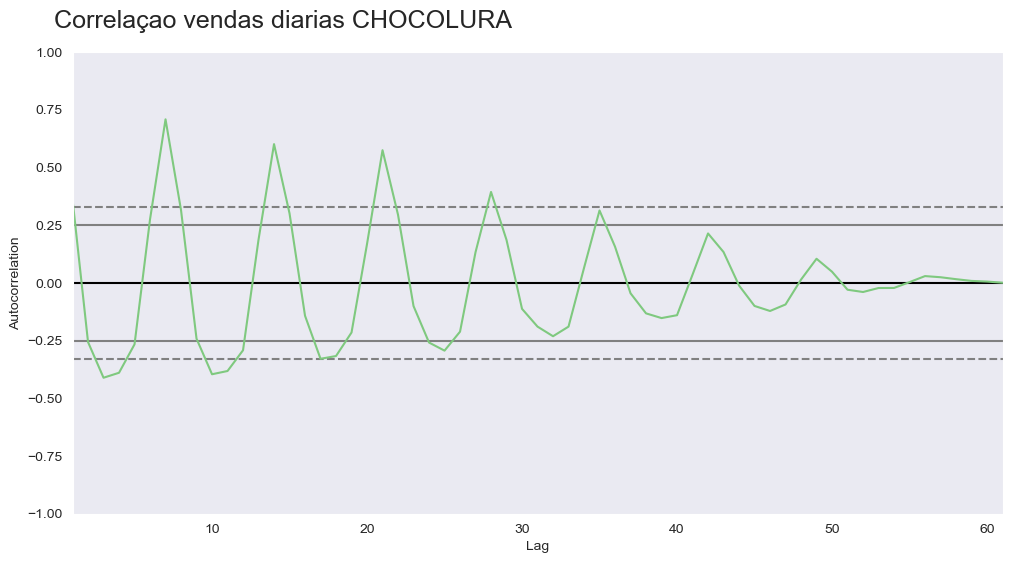

In [548]:
#correlaçao
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlaçao vendas diarias CHOCOLURA', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

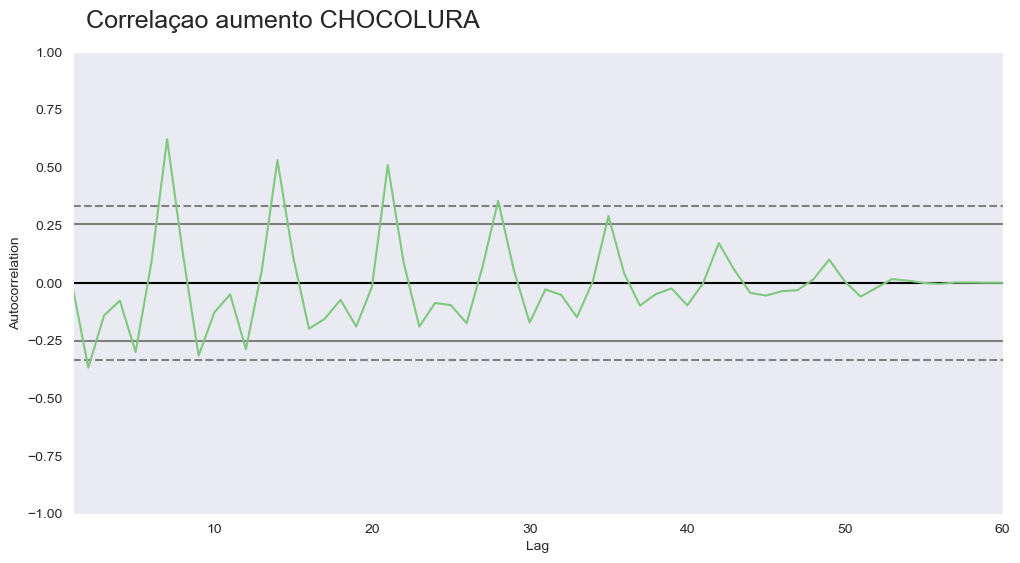

In [549]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlaçao aumento CHOCOLURA', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

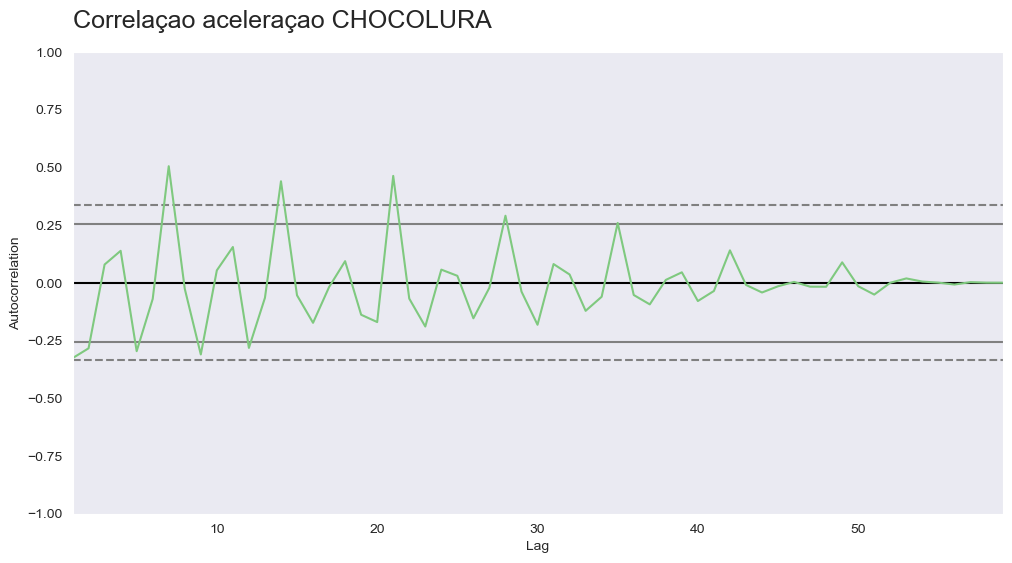

In [550]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlaçao aceleraçao CHOCOLURA', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

## Analise CAFELURA

In [551]:
cafelura = pd.read_csv('Dados/cafelura.csv')

cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [552]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [553]:
cafelura.shape

(24, 2)

In [554]:
cafelura.isna().sum().sum()

0

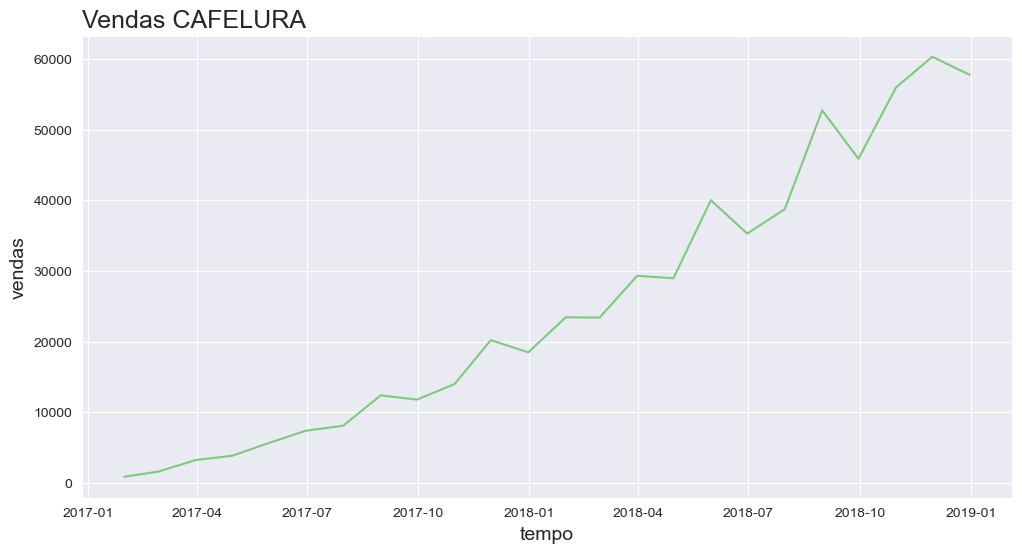

In [555]:
plotar('Vendas CAFELURA','tempo', 'vendas', 'mes', 'vendas', cafelura)

In [556]:
#Normalizaçao dos dados, na quantidade de fds e feriado
quantidade_de_dias_de_fds = pd.read_csv('Dados/dias_final_de_semana.csv')

In [557]:
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [558]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [559]:
#dividir as vendas pelos dias da semana
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


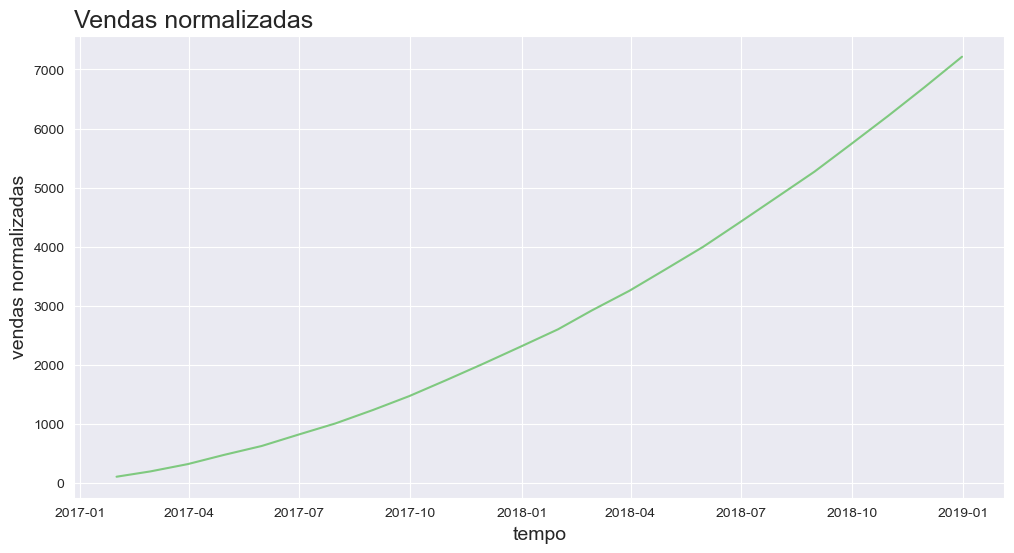

In [560]:
plotar('Vendas normalizadas', 'tempo', 'vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura)

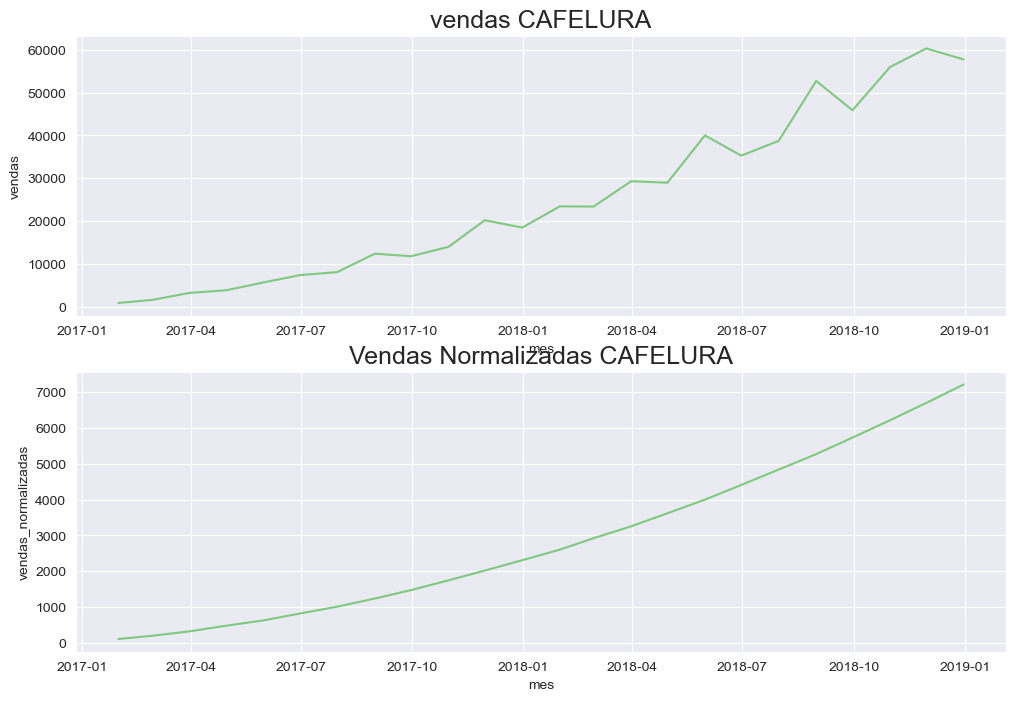

In [561]:
plt.figure(figsize=(12,8))
ax = plt.subplot(2,1,1)
ax.set_title('vendas CAFELURA', fontsize = 18)
sns.lineplot(x = 'mes', y= 'vendas', data= cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas CAFELURA', fontsize = 18)
sns.lineplot(x = 'mes', y= 'vendas_normalizadas', data= cafelura)
ax = ax


### Statsmodels

In [562]:
from statsmodels.tsa.seasonal import seasonal_decompose

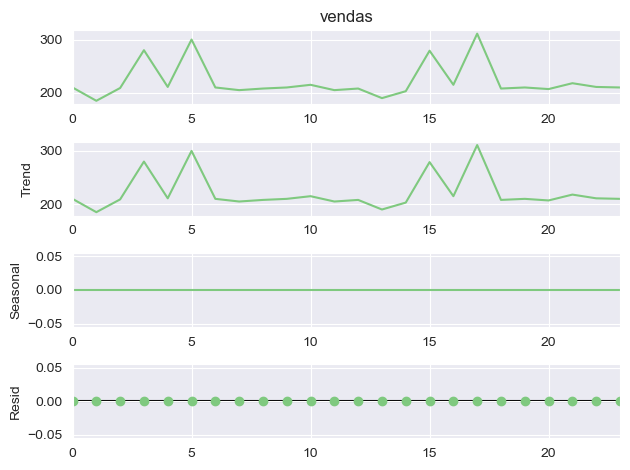

In [573]:
resultado = seasonal_decompose(chocolura["vendas"], period=1)
ax = resultado.plot()

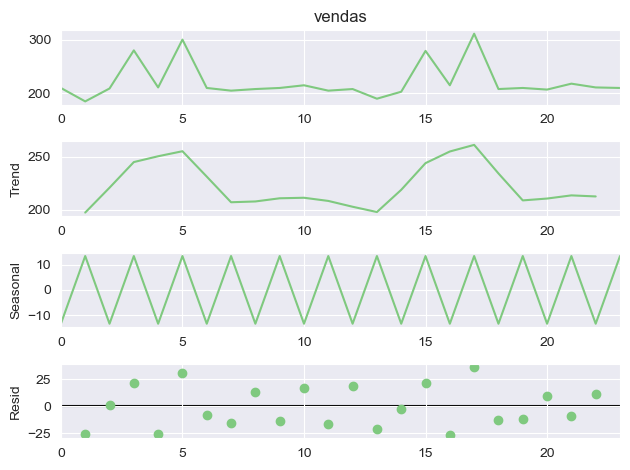

In [574]:
resultado = seasonal_decompose(chocolura["vendas"], period=2) #mudando os periodos de analise
ax = resultado.plot()

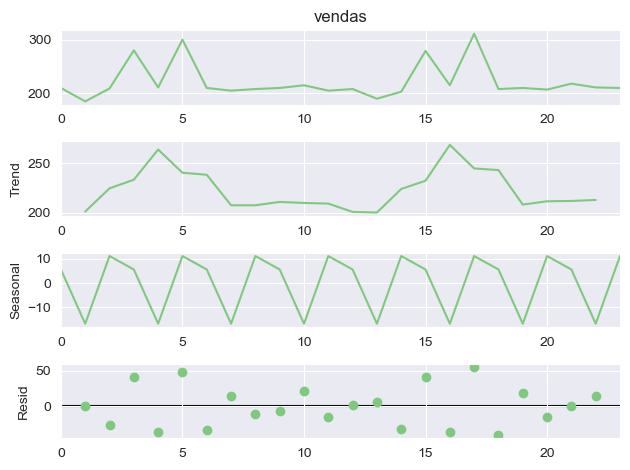

In [575]:
resultado = seasonal_decompose(chocolura["vendas"], period=3) #mudando os periodos de analise
ax = resultado.plot()

In [576]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [581]:
data = ({
    'observacao' : observacao,
    'tendencia' : tendencia,
    'sazonalidade' : sazonalidade,
    'ruido': ruido
})

resultado = pd.DataFrame(data)
resultado.head().round(2)

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.60,NaN
1,185.0,201.33,-16.73,0.40
2,209.0,224.67,11.13,-26.79
3,280.0,233.33,5.60,41.06
4,211.0,263.67,-16.73,-35.94


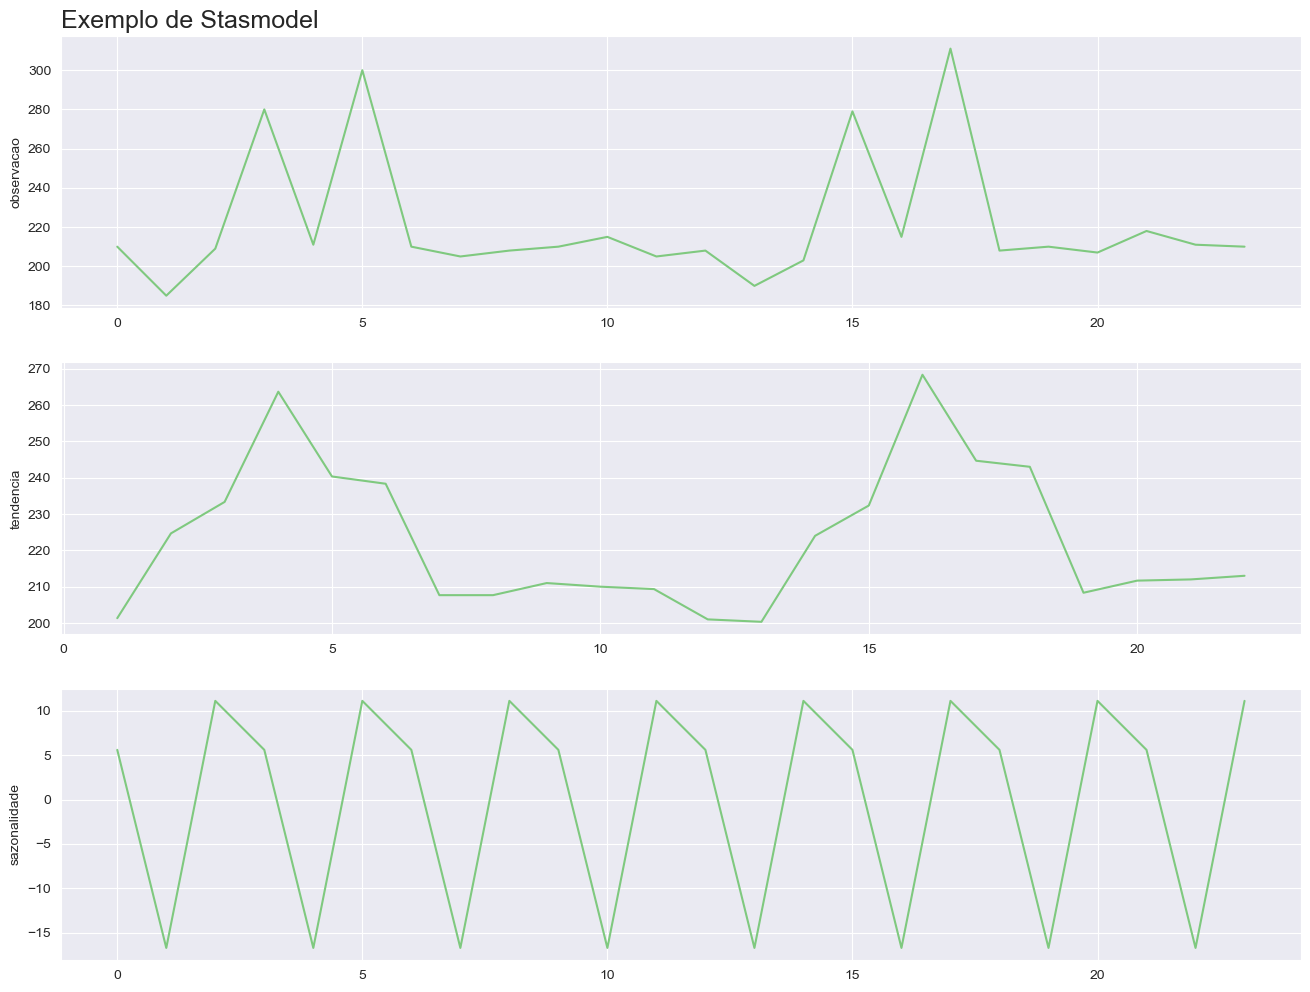

In [584]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Stasmodel')

## Ruidos e media movel

### Analise ALUCEL

In [586]:
alucel = pd.read_csv('Dados/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [588]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [589]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()

In [590]:
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


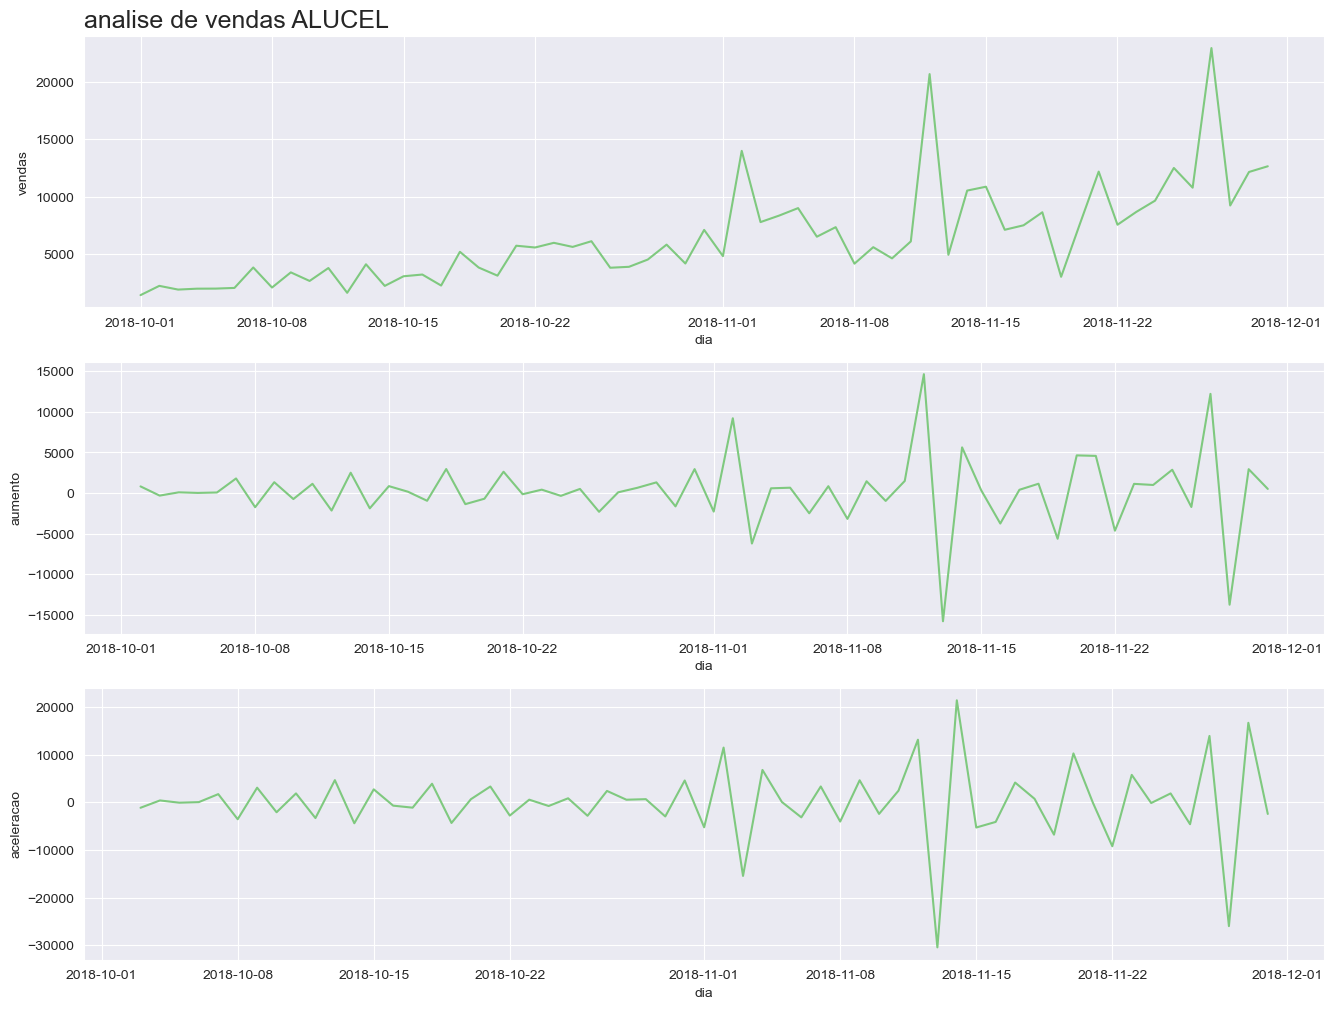

In [591]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'analise de vendas ALUCEL')
#muido ruido nesses graficos

#### Média movel

In [592]:
alucel['media movel'] = alucel['vendas'].rolling(7).mean() #media movel para 7 dias
alucel.head()

,dia,vendas,aumento,aceleracao,media movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN


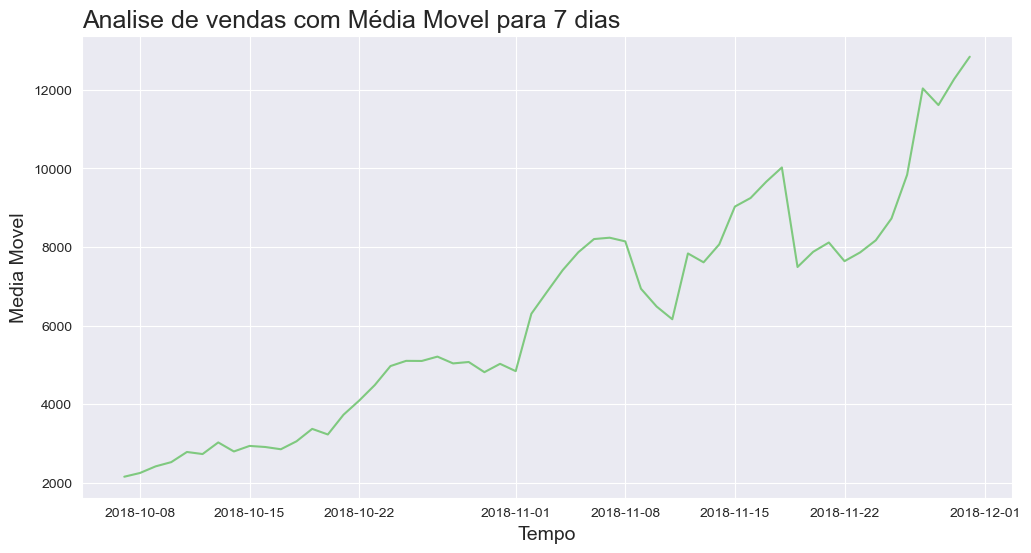

In [595]:
plotar('Analise de vendas com Média Movel para 7 dias', 'Tempo', 'Media Movel', 'dia', 'media movel', alucel)

In [596]:
alucel['media movel 21'] = alucel['vendas'].rolling(21).mean() #media movel para 21 dias
alucel.head()

,dia,vendas,aumento,aceleracao,media movel,media movel 21
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN


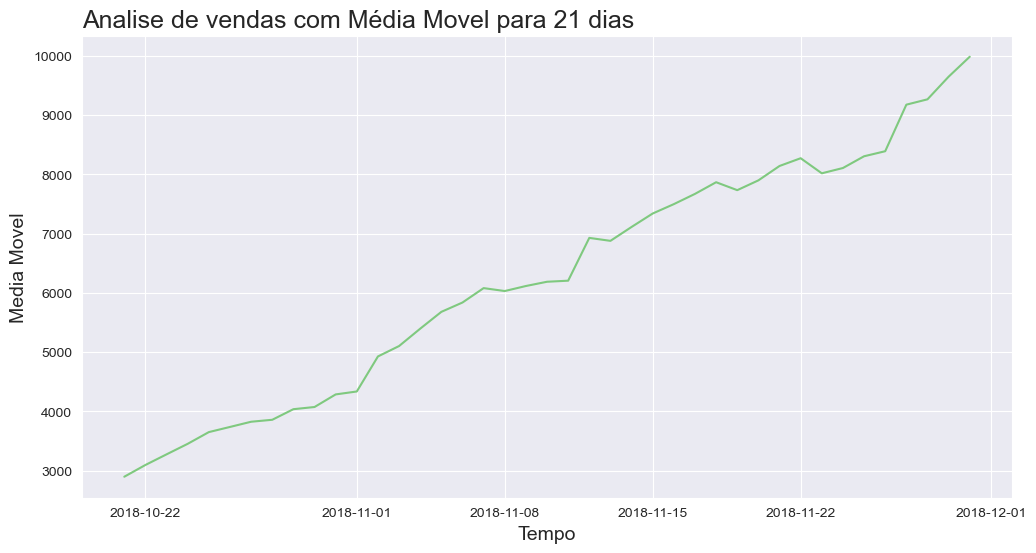

In [597]:
plotar('Analise de vendas com Média Movel para 21 dias', 'Tempo', 'Media Movel', 'dia', 'media movel 21', alucel)

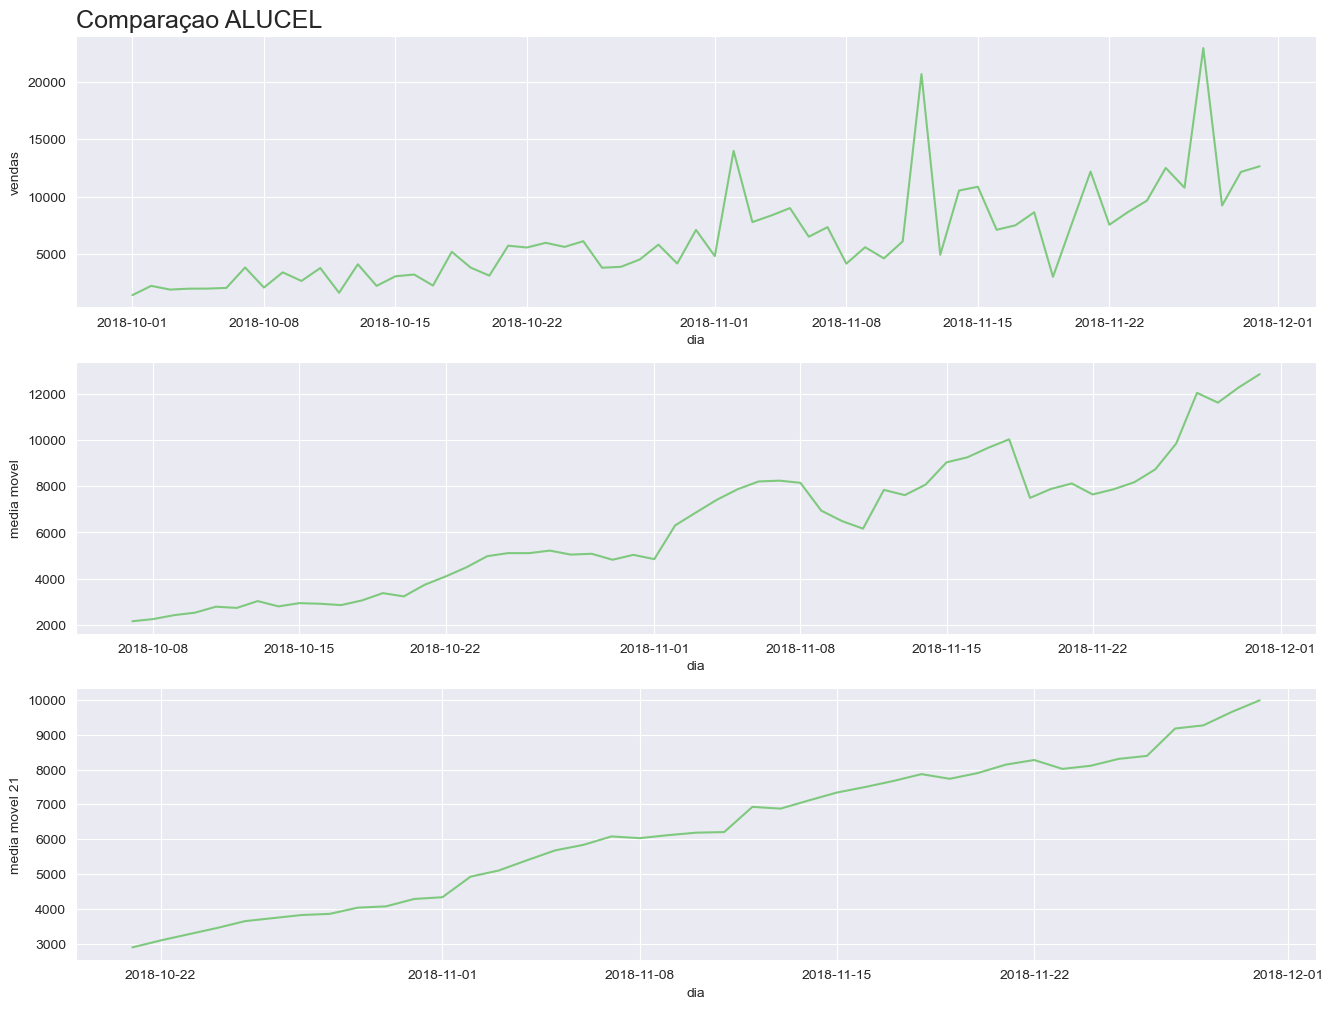

In [598]:
plot_comparacao('dia', 'vendas', 'media movel', 'media movel 21', alucel, 'Comparaçao ALUCEL')